In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import getcwd
%config InlineBackend.figure_format = 'retina'

print(getcwd())


def load_results(file_path):
    data = pd.read_hdf(("../model_results/" + file_path), key='data').query("dataset=='test' | dataset=='train' | (dataset=='baseline' & iter < 1)")
    return pd.concat([data, data.query("dataset=='baseline'").assign(iter=14)], axis=0)



def plot_results(loss=None, y='pred_loss', title: str=""):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(data=pd.DataFrame(loss), x='iter', y=y, ax=ax, hue='dataset')
    ax.set_title(title, fontsize=15)

c:\Users\User\Documents\GitHub\gatech\OMSA_CDA_isye6740\HW\project\src


In [113]:
result_set = ["train_results2022-08-02__03-26___personas-1__latents-4.hdf5", 
"train_results2022-08-02__03-27___personas-2__latents-4.hdf5", 
"train_results2022-08-02__03-27___personas-1__latents-12.hdf5 ",
 "train_results2022-08-02__03-28___personas-2__latents-8.hdf5", 
"train_results2022-08-02__03-27___personas-1__latents-8.hdf5", 
"train_results2022-08-02__03-30___personas-3__latents-4.hdf5",]

In [114]:
load_results(result_set[0])

,total_loss,dataset,iter,pred_loss,user_loss,item_loss
1,67.702113,baseline,0.0,26.264174,39.540788,1.897151
2,0.560546,train,0.0,0.000009,0.559505,0.001033
3,0.560661,test,0.0,0.000123,0.559505,0.001033
4,3.170183,train,1.0,0.011571,0.596243,2.562369
5,3.428662,test,1.0,0.270050,0.596243,2.562369
6,3.232069,train,2.0,0.010237,0.610644,2.611188
7,3.513228,test,2.0,0.291396,0.610644,2.611188
8,3.123772,train,3.0,0.009934,0.623741,2.490097
9,3.407965,test,3.0,0.294128,0.623741,2.490097
10,3.024990,train,4.0,0.009751,0.636257,2.378982


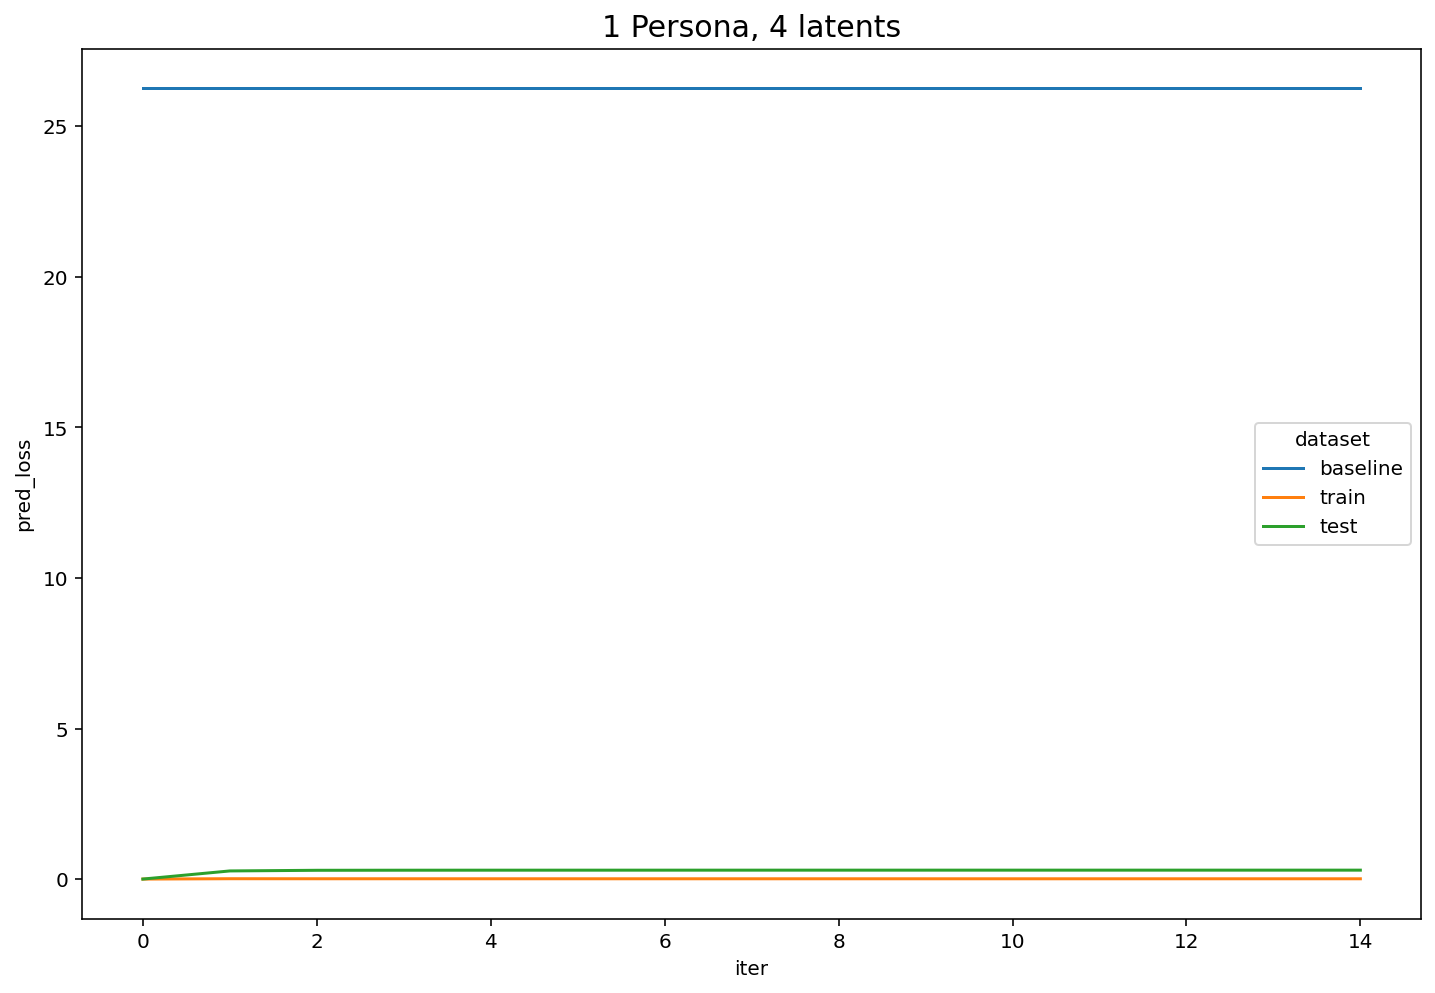

In [117]:
plot_results(load_results(result_set[0]), title="1 Persona, 4 latents")

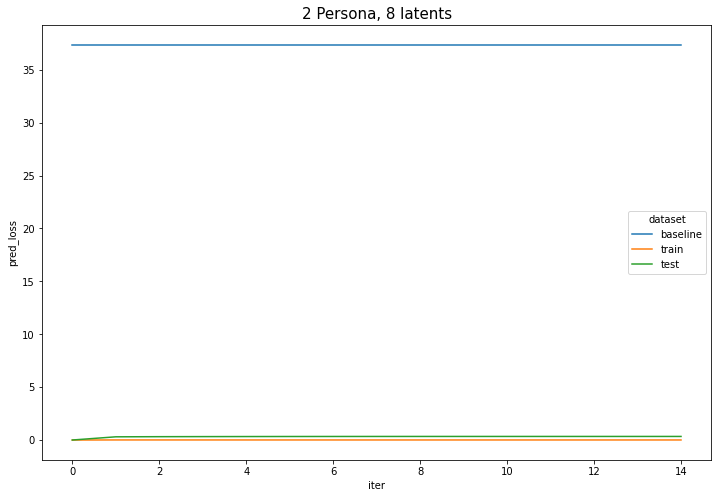

In [111]:
plot_results(load_results(result_set[3]), title="2 Persona, 8 latents")

Text(0.5, 1.0, 'Prediction Loss from Number of Latent variables and Personas')

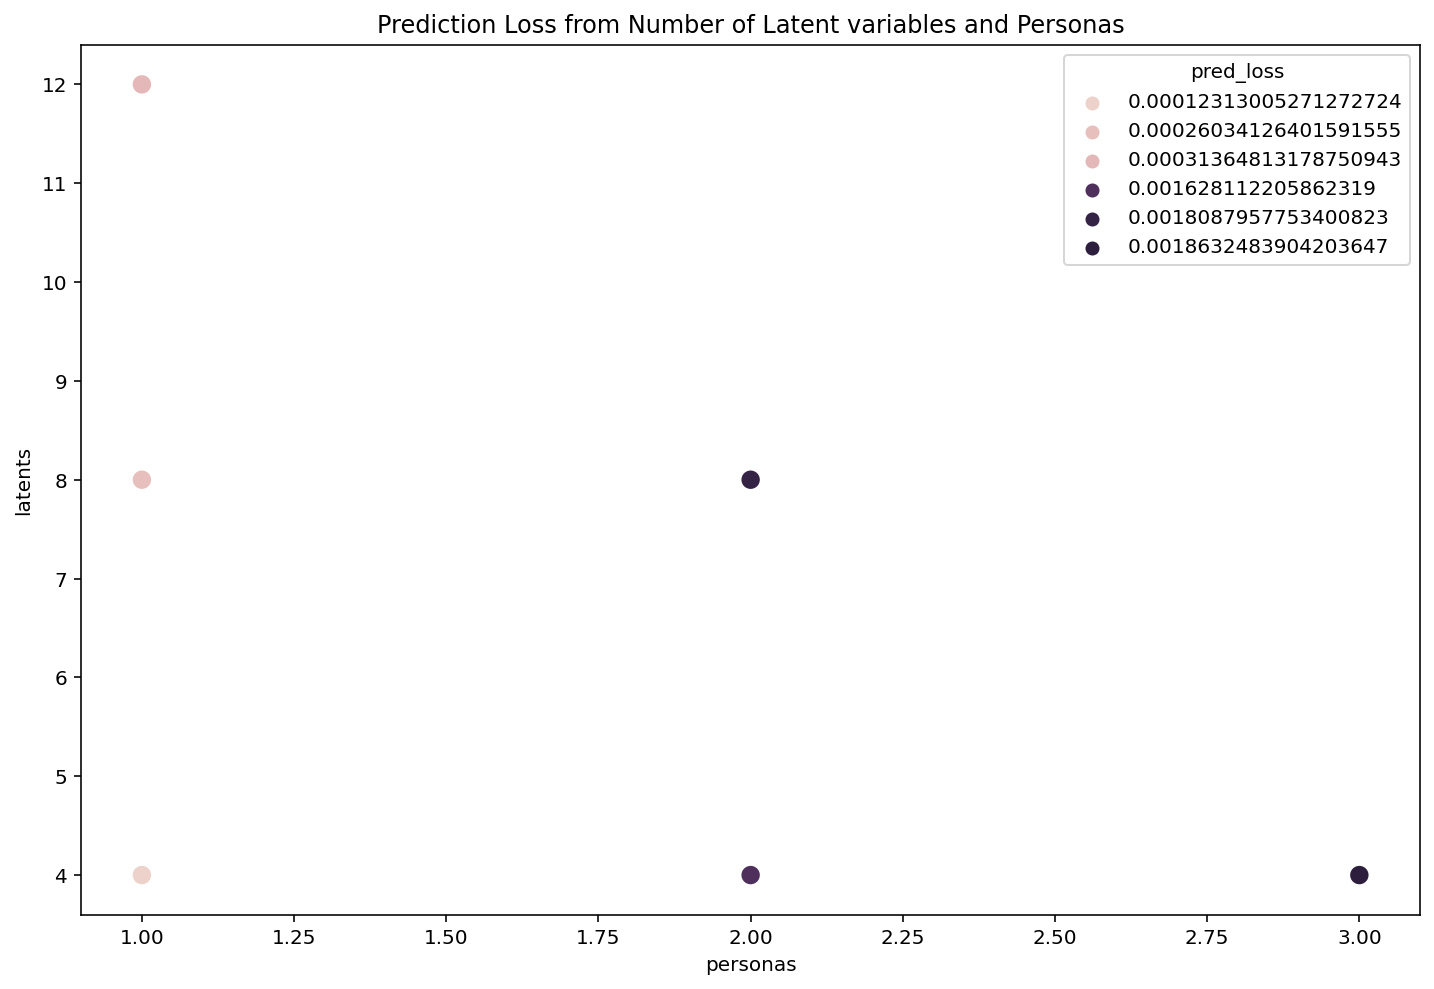

In [153]:
def load_results(file_path):
    data = pd.read_hdf(("../model_results/" + file_path), key='data').query("dataset=='test'")
    minrow = data.query("dataset=='test'").sort_values(by='pred_loss').iloc[0, :].to_frame().T.loc[:, 'pred_loss'].to_frame()
    return minrow


full = pd.concat([load_results(result_set[0]).assign(personas=1, latents=4),
                  load_results(result_set[1]).assign(personas=2, latents=4),
           load_results(result_set[2]).assign(personas=1, latents=12),
           load_results(result_set[3]).assign(personas=2, latents=8),
           load_results(result_set[4]).assign(personas=1, latents=8),
           load_results(result_set[5]).assign(personas=3, latents=4)]).round(decimals=5)
           

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=full, x='personas', y='latents', hue='pred_loss', ax=ax, s=100)
ax.set_title("Prediction Loss from Number of Latent variables and Personas", fontsize=12)


In [136]:
result_set

['train_results2022-08-02__03-26___personas-1__latents-4.hdf5',
 'train_results2022-08-02__03-27___personas-2__latents-4.hdf5',
 'train_results2022-08-02__03-27___personas-1__latents-12.hdf5 ',
 'train_results2022-08-02__03-28___personas-2__latents-8.hdf5',
 'train_results2022-08-02__03-27___personas-1__latents-8.hdf5',
 'train_results2022-08-02__03-30___personas-3__latents-4.hdf5']